In [18]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss

In [20]:
files = glob.glob (r"D:/output_England/*.csv")
print("Found files:", len(files), files[:3])
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

Found files: 2 ['D:/output_England\\Premier League-2022.csv', 'D:/output_England\\Premier League-2023.csv']


In [21]:
df

,date,id,referee,home_team,away_team,home_goals,away_goals,result,total_goals,goal_diff
0,2022-08-05 19:00:00,867946,A. Taylor,Crystal Palace,Arsenal,0,2,away,2,-2
1,2022-08-06 11:30:00,867947,A. Madley,Fulham,Liverpool,2,2,draw,4,0
2,2022-08-06 14:00:00,867951,S. Hooper,Newcastle,Nottingham Forest,2,0,home,2,2
3,2022-08-06 14:00:00,867948,P. Bankes,Bournemouth,Aston Villa,2,0,home,2,2
4,2022-08-06 14:00:00,867952,A. Marriner,Tottenham,Southampton,4,1,home,5,3
...,...,...,...,...,...,...,...,...,...,...
755,2024-05-19 15:00:00,1035547,G. Scott,Burnley,Nottingham Forest,1,2,away,3,-1
756,2024-05-19 15:00:00,1035544,M. Oliver,Arsenal,Everton,2,1,home,3,1
757,2024-05-19 15:00:00,1035550,C. Kavanagh,Liverpool,Wolves,2,0,home,2,2
758,2024-05-19 15:00:00,1035548,A. Taylor,Chelsea,Bournemouth,2,1,home,3,1


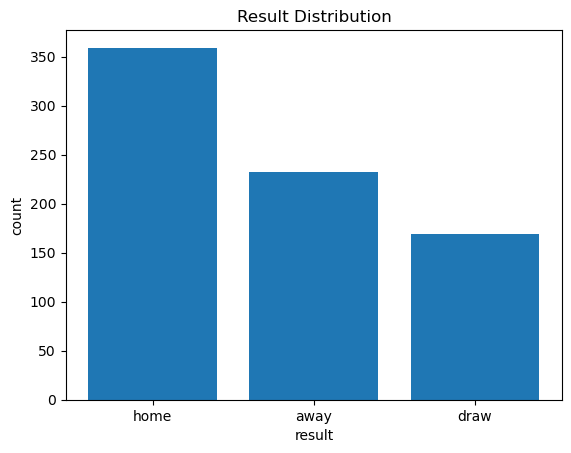

In [35]:
counts = df["result"].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Result Distribution")
plt.xlabel("result")
plt.ylabel("count")
plt.show()

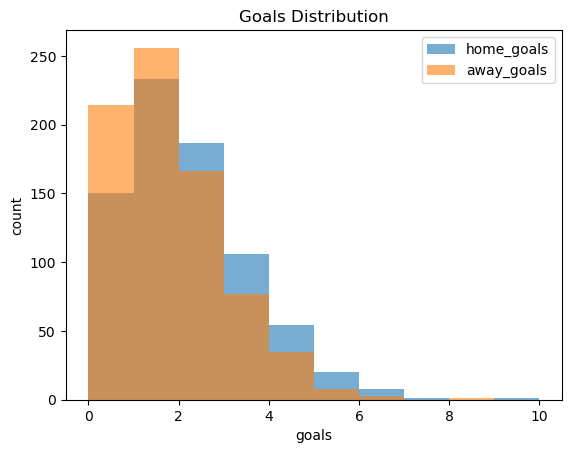

In [36]:
plt.figure()
plt.hist(df["home_goals"], bins=range(0, int(df["home_goals"].max())+2), alpha=0.6, label="home_goals")
plt.hist(df["away_goals"], bins=range(0, int(df["away_goals"].max())+2), alpha=0.6, label="away_goals")
plt.title("Goals Distribution")
plt.xlabel("goals")
plt.ylabel("count")
plt.legend()
plt.show()

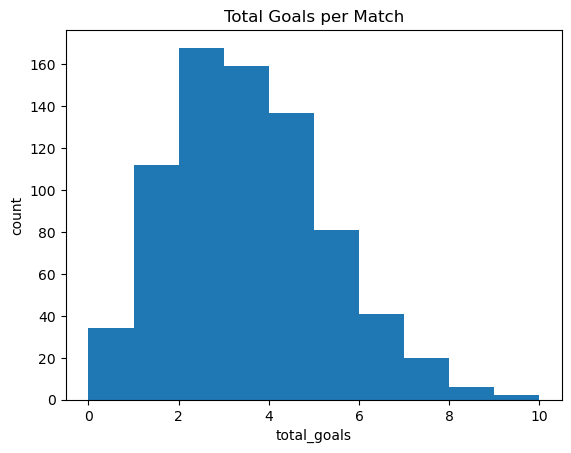

In [37]:
plt.figure()
plt.hist(df["total_goals"], bins=range(0, int(df["total_goals"].max()) + 2))
plt.title("Total Goals per Match")
plt.xlabel("total_goals")
plt.ylabel("count")   
plt.show()

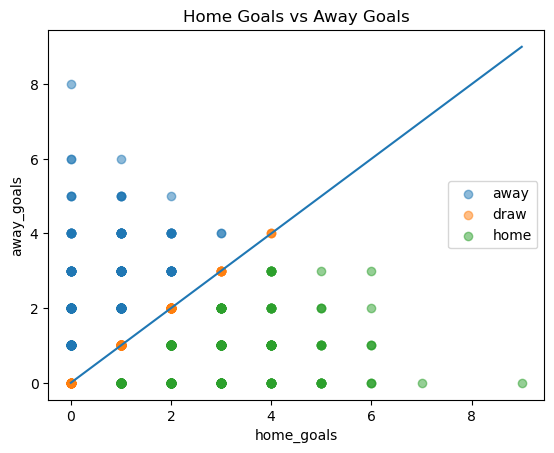

In [38]:
plt.figure()
for r, g in df.groupby("result"):
    plt.scatter(g["home_goals"], g["away_goals"], label=str(r), alpha=0.5)

plt.plot([0, df[["home_goals", "away_goals"]].max().max()],
         [0, df[["home_goals","away_goals"]].max().max()])
plt.title("Home Goals vs Away Goals")
plt.xlabel("home_goals")
plt.ylabel("away_goals")
plt.legend()
plt.show()

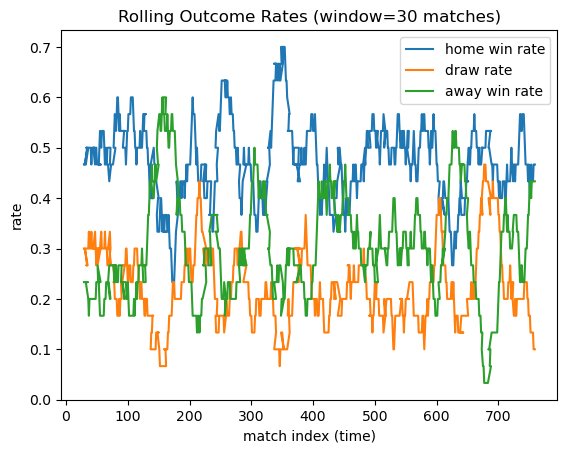

In [39]:
df_sorted = df.sort_values("date")

home_win = (df_sorted["result"] == "home").astype(int)
away_win = (df_sorted["result"] == "away").astype(int)
draw = (df_sorted["result"] == "draw").astype(int)

window = 30
plt.figure()
plt.plot(home_win.rolling(window).mean(), label="home win rate")
plt.plot(draw.rolling(window).mean(), label="draw rate")
plt.plot(away_win.rolling(window).mean(), label="away win rate")
plt.title(f"Rolling Outcome Rates (window={window} matches)")
plt.xlabel("match index (time)")
plt.ylabel("rate")
plt.legend()
plt.show()